In [1]:
#load all necessary libraries
import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

**1. Data Exploration:**

- a. Load the dataset and perform exploratory data analysis (EDA).
- b. Examine the features, their types, and summary statistics.
- c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

**2. Data Preprocessing:**

- a. Handle missing values (e.g., imputation).
- b. Encode categorical variables.



In [14]:
#Loading training and testing dataset
train_df = pd.read_csv(r'Titanic_train.csv')
test_df = pd.read_csv(r'Titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **Perform EDA on Training/Testing Data:**

In [16]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Age, Cabin and Embarked** cloumns have missing values.

In [17]:
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Create a new feature indicating whether a cabin number is available
train_df['CabinAvailable'] = train_df['Cabin'].notna().astype(int)


In [18]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Age, Fare and Cabin** cloumns have missing values.

In [19]:
#Handle missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Create a new feature indicating whether a cabin number is available
test_df['CabinAvailable'] = test_df['Cabin'].notna().astype(int)


**Handle Missing Values:**
- **Age:** Fill missing values with the median age.
- **Fare:** Fill missing values with the median fare (in the test dataset).
- **Embarked:** Fill missing values with the most frequent value (mode).
- **Cabin:** Created a new feature indicating whether a cabin number is available, then dropped the original Cabin column.

In [20]:
# Drop the original Cabin feature
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [21]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'CabinAvailable'],
      dtype='object')

In [22]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'CabinAvailable'],
      dtype='object')

In [23]:
#Datatypes
train_df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Embarked           object
CabinAvailable      int64
dtype: object

Here **Age,Cabin and Embarked** have missing values.

In [24]:
#Typecasting
train_df['Age'] = train_df['Age'].astype('int64')
train_df[['Name','Ticket','Embarked','Sex']] = train_df[['Name','Ticket','Embarked','Sex']].astype('category') # Removed 'Cabin' from the list to match both sides

In [25]:
#Typecasting
test_df['Age'] = test_df['Age'].astype('int64')
test_df[['Name','Ticket','Embarked','Sex']] = test_df[['Name','Ticket','Embarked','Sex']].astype('category') # Removed 'Cabin' from the list to match both sides

In [26]:
#Summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinAvailable
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


- **Survival Rate:** About 38.38% of passengers survived.
- **Passenger Class:** Most passengers were in the third class.
- **Age:** The average age of passengers was around 30 years, with some missing values.
- **Family Aboard:** Most passengers traveled with few or no family members.
- **Fare:** There is a wide range of fares paid, with a significant standard deviation indicating diverse socio-economic backgrounds among the passengers.

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Pclass          418 non-null    int64   
 2   Name            418 non-null    category
 3   Sex             418 non-null    category
 4   Age             418 non-null    int64   
 5   SibSp           418 non-null    int64   
 6   Parch           418 non-null    int64   
 7   Ticket          418 non-null    category
 8   Fare            418 non-null    float64 
 9   Embarked        418 non-null    category
 10  CabinAvailable  418 non-null    int64   
dtypes: category(4), float64(1), int64(6)
memory usage: 56.1 KB


In [28]:
#Summary Stastics
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinAvailable
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.574163,0.447368,0.392344,35.576535,0.217703
std,120.810458,0.841838,12.721533,0.896760,0.981429,55.850103,0.413179
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [29]:
# Ensure both datasets have the same columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Survived')]

In [30]:
# Display the first few rows
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Embarked  CabinAvailable  
0      0         A/5 21171   7.2500        S               0  
1      0          PC 17599  71.2833        C               1  
2      0  STON/O2. 3101282   7.9250        S               0  
3      0            113803  53.1000        S               1  
4      0   

In [31]:
train_df.dtypes, test_df.dtypes

(PassengerId          int64
 Survived             int64
 Pclass               int64
 Name              category
 Sex               category
 Age                  int64
 SibSp                int64
 Parch                int64
 Ticket            category
 Fare               float64
 Embarked          category
 CabinAvailable       int64
 dtype: object,
 PassengerId          int64
 Pclass               int64
 Name              category
 Sex               category
 Age                  int64
 SibSp                int64
 Parch                int64
 Ticket            category
 Fare               float64
 Embarked          category
 CabinAvailable       int64
 dtype: object)

### Univariate Categorical Variable

In [32]:
categorical_cols_train = train_df.select_dtypes(include = 'category')
categorical_cols_test = test_df.select_dtypes(include = 'category')

In [33]:
#categorical training values
categorical_cols_train.nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [34]:
#categorical testing values
categorical_cols_test.nunique()

Name        418
Sex           2
Ticket      363
Embarked      3
dtype: int64

In [35]:
#Values of categorial taining columns
categorical_cols_train.value_counts()

Name                                     Sex     Ticket     Embarked
Abbing, Mr. Anthony                      male    C.A. 5547  S           1
Nysveen, Mr. Johan Hansen                male    345364     S           1
Nicholson, Mr. Arthur Ernest             male    693        S           1
Nicola-Yarred, Master. Elias             male    2651       C           1
Nicola-Yarred, Miss. Jamila              female  2651       C           1
                                                                       ..
Goodwin, Miss. Lillian Amy               female  CA 2144    S           1
Goodwin, Mr. Charles Edward              male    CA 2144    S           1
Goodwin, Mrs. Frederick (Augusta Tyler)  female  CA 2144    S           1
Graham, Miss. Margaret Edith             female  112053     S           1
van Melkebeke, Mr. Philemon              male    345777     S           1
Name: count, Length: 891, dtype: int64

In [36]:
#Values of caetgorical testing columns
categorical_cols_test.value_counts()

Name                                 Sex     Ticket      Embarked
Abbott, Master. Eugene Joseph        male    C.A. 2673   S           1
Rheims, Mr. George Alexander Lucien  male    PC 17607    S           1
Olsson, Mr. Oscar Wilhelm            male    347079      S           1
Olsen, Master. Artur Karl            male    C 17368     S           1
Oliva y Ocana, Dona. Fermina         female  PC 17758    C           1
                                                                    ..
Fillbrook, Mr. Joseph Charles        male    C.A. 15185  S           1
Faunthorpe, Mr. Harry                male    2926        S           1
Everett, Mr. Thomas James            male    C.A. 6212   S           1
Evans, Miss. Edith Corse             female  PC 17531    C           1
van Billiard, Master. Walter John    male    A/5. 851    S           1
Name: count, Length: 418, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

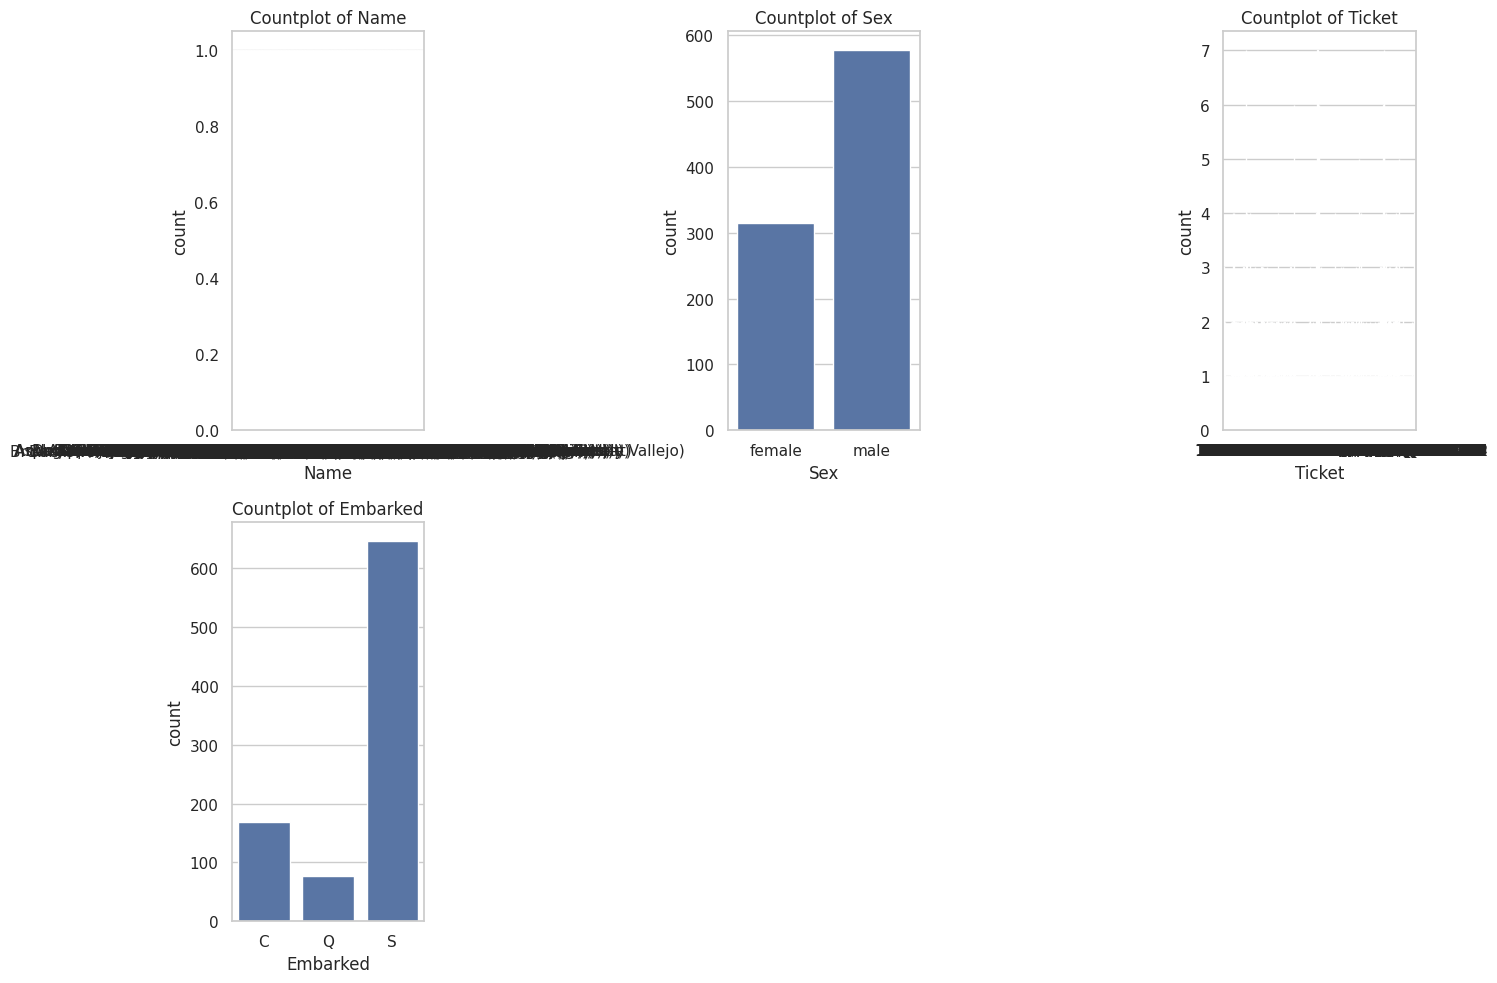

In [37]:


# Assuming categorical_cols_train contains the categorical columns from the training dataset
categorical_cols = categorical_cols_train.columns

# Define the number of rows and columns for the subplots grid
n_cols = 3  # Adjust based on how many columns you want per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and plot the violin plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show


- **Countplot of Sex:** This plot shows two bars—one for females and one for males. The male category appears to have a significantly higher count.
- **Countplot of Embarked:** This plot shows S has higher count followed by C and Q.

<function matplotlib.pyplot.show(close=None, block=None)>

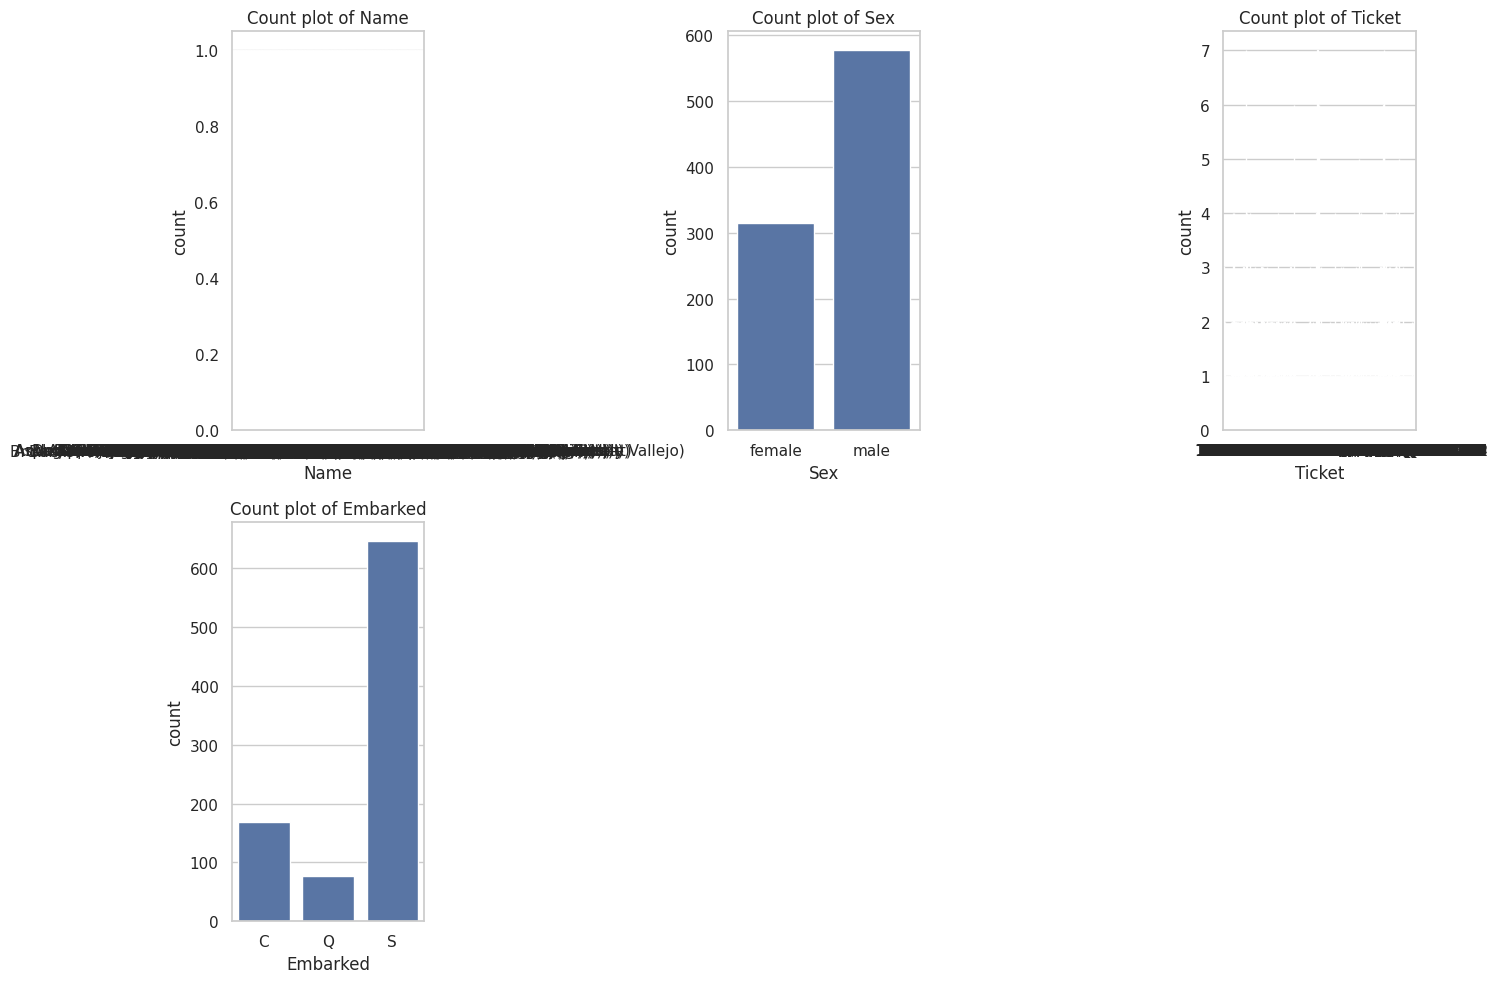

In [38]:


# Assuming categorical_cols_train contains the categorical columns from the training dataset
categorical_cols = categorical_cols_train.columns

# Define the number of rows and columns for the subplots grid
n_cols = 3  # Adjust based on how many columns you want per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and plot the violin plots
for i, col in enumerate(categorical_cols):
    sns.countplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show

- **Countplot of Sex:** This plot shows two bars—one for females and one for males. The male category appears to have a significantly higher count.
- **Countplot of Embarked:** This plot shows S has higher count followed by C and Q.

**Encode Categorical Variables:**
- Convert 'Sex' and 'Embarked' to numerical values using one-hot encoding.


In [39]:
# Encode categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

In [40]:
#Verify
train_df.head()
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,CabinAvailable,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,0,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,0,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,0,True,True,False
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,0,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,0,False,False,True


In [41]:
train_df.dtypes, test_df.dtypes

(PassengerId          int64
 Survived             int64
 Pclass               int64
 Name              category
 Age                  int64
 SibSp                int64
 Parch                int64
 Ticket            category
 Fare               float64
 CabinAvailable       int64
 Sex_male              bool
 Embarked_Q            bool
 Embarked_S            bool
 dtype: object,
 PassengerId          int64
 Pclass               int64
 Name              category
 Age                  int64
 SibSp                int64
 Parch                int64
 Ticket            category
 Fare               float64
 CabinAvailable       int64
 Sex_male              bool
 Embarked_Q            bool
 Embarked_S            bool
 dtype: object)

##Univariate Numerical Variables

In [42]:
numerical_cols_train = train_df[['Age', 'SibSp', 'Parch', 'Fare','CabinAvailable','Survived','Pclass','PassengerId']]
numerical_cols_test = test_df[['Age', 'SibSp', 'Parch', 'Fare','CabinAvailable','Pclass','PassengerId']]

In [43]:
#Training columns
for col in numerical_cols_train.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_train[col].min(), ", ",numerical_cols_train[col].max(),"]"))

range of Age: [0, 80]
range of SibSp: [0, 8]
range of Parch: [0, 6]
range of Fare: [0.0, 512.3292]
range of CabinAvailable: [0, 1]
range of Survived: [0, 1]
range of Pclass: [1, 3]
range of PassengerId: [1, 891]


In [44]:
#Testing columns
for col in numerical_cols_test.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_test[col].min(), ", ",numerical_cols_test[col].max(),"]"))

range of Age: [0, 76]
range of SibSp: [0, 8]
range of Parch: [0, 9]
range of Fare: [0.0, 512.3292]
range of CabinAvailable: [0, 1]
range of Pclass: [1, 3]
range of PassengerId: [892, 1309]


In [45]:
#training data
for col in numerical_cols_train.columns:
    print("Standard deviation and variance of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_train[col].std(), ", ",numerical_cols_train[col].var(),"]"))
    # Use numerical_cols_train[col] to access the data in the column and then calculate std and var

Standard deviation and variance of Age: [13.02821186279203, 169.73430434179497]
Standard deviation and variance of SibSp: [1.1027434322934317, 1.2160430774662985]
Standard deviation and variance of Parch: [0.8060572211299483, 0.6497282437357343]
Standard deviation and variance of Fare: [49.6934285971809, 2469.436845743116]
Standard deviation and variance of CabinAvailable: [0.420396989069881, 0.17673362841902165]
Standard deviation and variance of Survived: [0.4865924542648575, 0.23677221654749742]
Standard deviation and variance of Pclass: [0.836071240977049, 0.6990151199889028]
Standard deviation and variance of PassengerId: [257.3538420152301, 66231.0]


In [46]:
#Testing data
for col in numerical_cols_test.columns:
    print("Standard deviation and variance of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_test[col].std(), ", ",numerical_cols_test[col].var(),"]"))

Standard deviation and variance of Age: [12.721533412555159, 161.83741236675732]
Standard deviation and variance of SibSp: [0.8967595611217135, 0.8041777104632082]
Standard deviation and variance of Parch: [0.9814288785371691, 0.9632026436267254]
Standard deviation and variance of Fare: [55.85010269407346, 3119.233970938552]
Standard deviation and variance of CabinAvailable: [0.4131791559418536, 0.1707170149048226]
Standard deviation and variance of Pclass: [0.8418375519640503, 0.7086904638968251]
Standard deviation and variance of PassengerId: [120.81045760473994, 14595.166666666666]


In [47]:
#Training columns
for col in numerical_cols_train.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_train[col].kurt(), ", ",numerical_cols_train[col].skew(),"]"))

Kurtosis and Skewness of Age: [0.9983911091682365, 0.5035697085944845]
Kurtosis and Skewness of SibSp: [17.880419726645968, 3.6953517271630565]
Kurtosis and Skewness of Parch: [9.778125179021648, 2.7491170471010933]
Kurtosis and Skewness of Fare: [33.39814088089868, 4.787316519674893]
Kurtosis and Skewness of CabinAvailable: [-0.33053519538700904, 1.2923667408185486]
Kurtosis and Skewness of Survived: [-1.775004671066304, 0.4785234382949897]
Kurtosis and Skewness of Pclass: [-1.2800149715782825, -0.6305479068752845]
Kurtosis and Skewness of PassengerId: [-1.1999999999999997, 0.0]


In [48]:
#Testing columns
for col in numerical_cols_test.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",numerical_cols_test[col].kurt(), ", ",numerical_cols_test[col].skew(),"]"))

Kurtosis and Skewness of Age: [0.931938624106746, 0.6510154205916665]
Kurtosis and Skewness of SibSp: [26.498712128269855, 4.168336568562722]
Kurtosis and Skewness of Parch: [31.41251290547421, 4.654461698299236]
Kurtosis and Skewness of Fare: [17.970402003319332, 3.6922987243405156]
Kurtosis and Skewness of CabinAvailable: [-0.1153614434472523, 1.3730307643774973]
Kurtosis and Skewness of Pclass: [-1.3826663845898164, -0.5341703482345055]
Kurtosis and Skewness of PassengerId: [-1.2, 0.0]


##Visualization of Outliers Using Boxplots


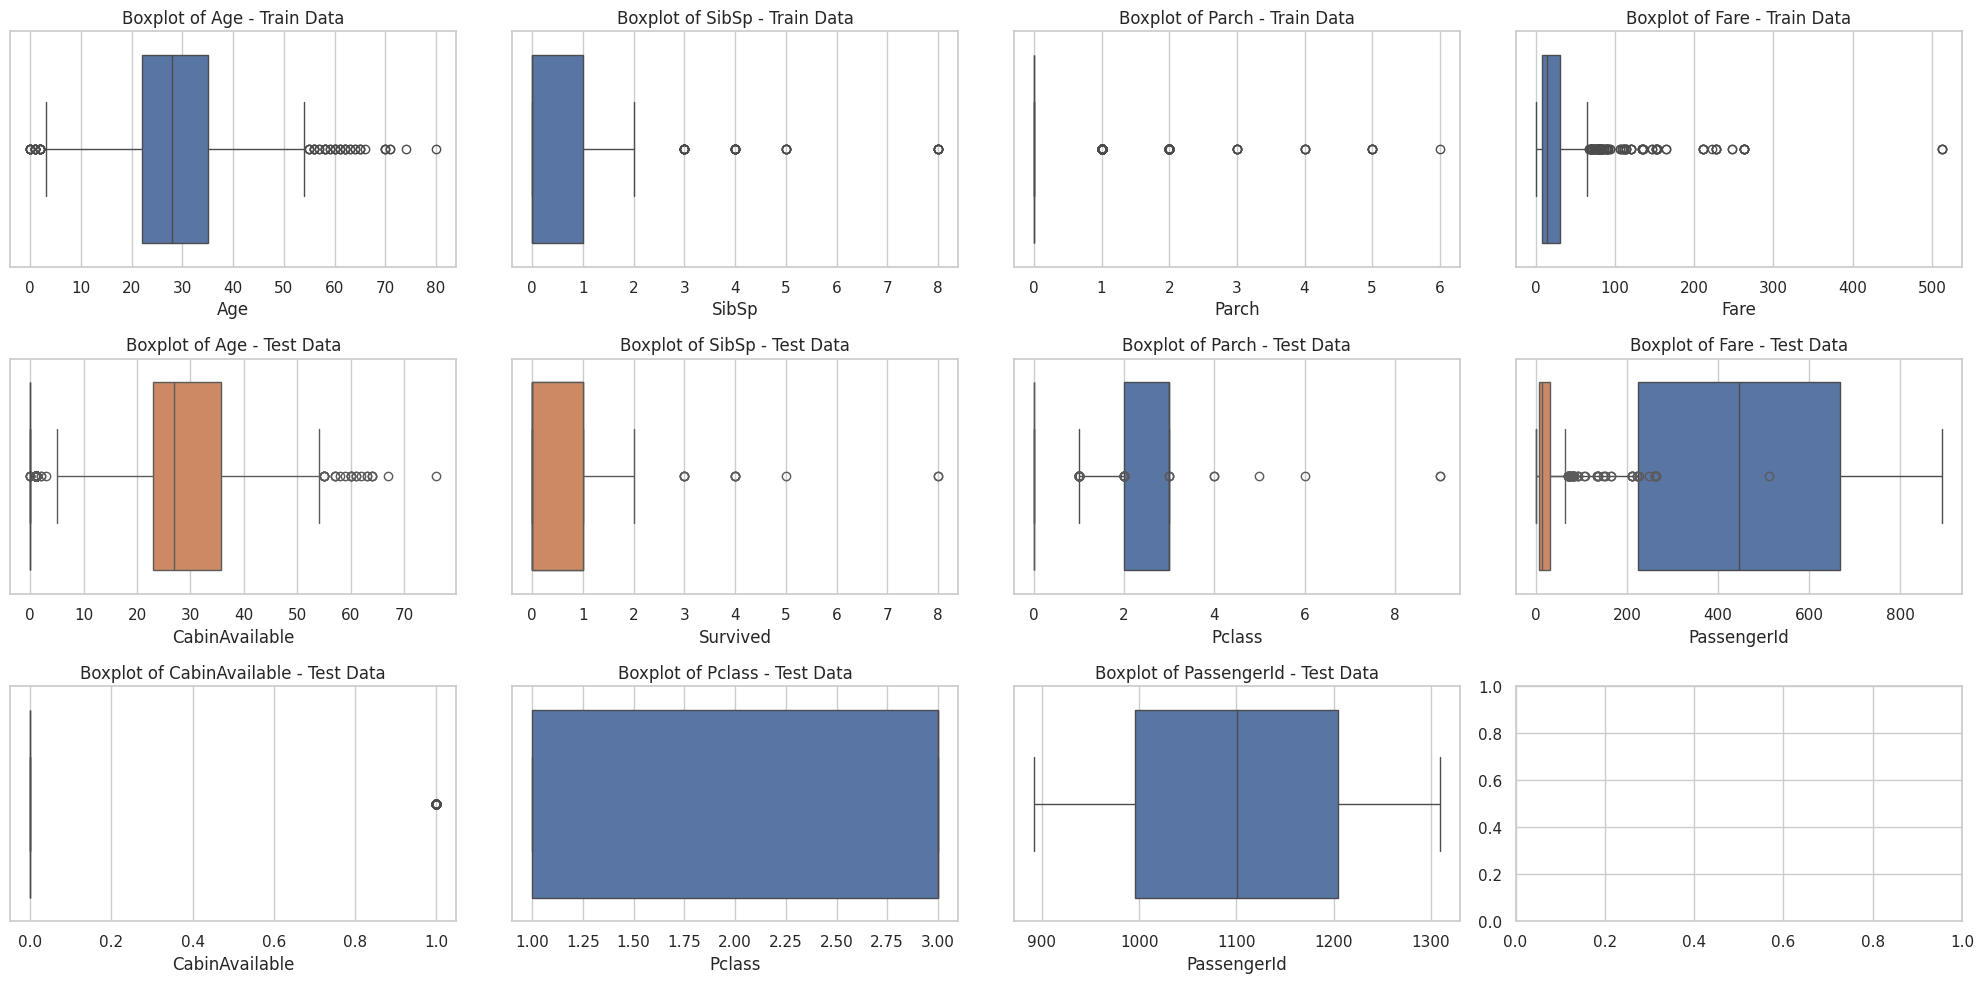

In [49]:
# Set style
sns.set(style="whitegrid")

# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 10))  # 3 rows, 4 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Visualize outliers in the train dataset
for i, column in enumerate(numerical_cols_train):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} - Train Data')

# Visualize outliers in the test dataset
# Start iterating from index 0 for test data plots
for i, column in enumerate(numerical_cols_test):
    sns.boxplot(x=test_df[column], ax=axes[i + 4])  # Use i + 4 to place plots in the second row
    axes[i + 4].set_title(f'Boxplot of {column} - Test Data')

# Adjust layout
plt.tight_layout()
plt.show()

The boxplots show the distribution of numerical variables in both the training and test datasets, highlighting the outliers:

**Age:**
- Both datasets contain outliers primarily among very young and older passengers.

**SibSp (Number of Siblings/Spouses Aboard):**
- The majority of outliers are passengers with more than three siblings or spouses on board.

**Parch (Number of Parents/Children Aboard):**
- Outliers mainly include passengers with more than three parents or children on board.

**Fare:**
- There are significant fare outliers, particularly high fares.

In [50]:
#Outliers treatment
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Find outliers in each numerical column
outliers_dict = {}
for column in numerical_cols_train:
    outliers = detect_outliers_iqr(train_df, column)
    outliers_dict[column] = outliers

# Display outliers
for column, outliers in outliers_dict.items():
    print(f'Outliers in {column}:')
    print(outliers)
    print('\n')

# Repeat the process for the test dataset
test_outliers_dict = {}
for column in numerical_cols_test:
    outliers = detect_outliers_iqr(test_df, column)
    test_outliers_dict[column] = outliers


Outliers in Age:
     PassengerId  Survived  Pclass  \
7              8         0       3   
11            12         1       1   
15            16         1       2   
16            17         0       3   
33            34         0       2   
..           ...       ...     ...   
827          828         1       2   
829          830         1       1   
831          832         1       2   
851          852         0       3   
879          880         1       1   

                                              Name  Age  SibSp  Parch  \
7                   Palsson, Master. Gosta Leonard    2      3      1   
11                        Bonnell, Miss. Elizabeth   58      0      0   
15                Hewlett, Mrs. (Mary D Kingcome)    55      0      0   
16                            Rice, Master. Eugene    2      4      1   
33                           Wheadon, Mr. Edward H   66      0      0   
..                                             ...  ...    ...    ...   
827            

**Outliers in Age:**
- Imputation: replace outlier ages with the median or mean age of the dataset.
- Capping: Cap the ages at a certain value, such as the 95th percentile.

**Outliers in SibSp and Parch:**
- Imputation: Replace high values with the median or mean.
- Capping: Cap the number of siblings/spouses or parents/children at a reasonable value based on the dataset's distribution.

**Outliers in Fare:**
- Imputation: Replace outlier fares with the median or mean fare.
- Capping: Cap the fare at the 95th percentile.

**Outliers in CabinAvailability:**
- This is a binary variable, so it doesn't have traditional outliers. No treatment is needed.

**No outliers in Survived, Pclass, and PassengerId:**
- No treatment is needed as there are no outliers detected in these variables.

In [51]:
# Define the capping function
def cap_outliers(df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Define the imputation function
def impute_outliers(df, column):
    median_value = df[column].median()
    df[column] = np.where(df[column] < 0, median_value, df[column])  # Assuming negative values are outliers
    return df

In [52]:
#Training data
# Treat outliers in Age
df = cap_outliers(train_df, 'Age')
df = impute_outliers(train_df, 'Age')

# Treat outliers in SibSp
df = cap_outliers(train_df, 'SibSp')
df = impute_outliers(train_df, 'SibSp')

# Treat outliers in Parch
df = cap_outliers(train_df, 'Parch')
df = impute_outliers(train_df, 'Parch')

# Treat outliers in Fare
df = cap_outliers(train_df, 'Fare')
df = impute_outliers(train_df, 'Fare')

In [53]:
# Display outliers in test dataset
for column, outliers in test_outliers_dict.items():
    print(f'Outliers in {column}:')
    print(outliers)
    print('\n')

Outliers in Age:
     PassengerId  Pclass                                               Name  \
2            894       2                          Myles, Mr. Thomas Francis   
13           905       2                               Howard, Mr. Benjamin   
20           912       1                             Rothschild, Mr. Martin   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
69           961       1                Fortune, Mrs. Mark (Mary McDougald)   
77           969       1  Cornell, Mrs. Robert Clifford (Malvina Helen L...   
81           973       1                                 Straus, Mr. Isidor   
89           981       2                        Wells, Master. Ralph Lester   
96           988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
114         1006       1             Straus, Mrs. Isidor (Rosalie Ida Blun)   
117         1009       3                    Sandstrom, Miss. Beatrice Irene   
142         1034       1           

**Outliers in Age, SibSp, Parch, and Fare**

In [54]:
#Testing data
# Treat outliers in Age
df = cap_outliers(test_df, 'Age')
df = impute_outliers(train_df, 'Age')

# Treat outliers in SibSp
df = cap_outliers(test_df, 'SibSp')
df = impute_outliers(train_df, 'SibSp')

# Treat outliers in Parch
df = cap_outliers(test_df, 'Parch')
df = impute_outliers(train_df, 'Parch')

# Treat outliers in Fare
df = cap_outliers(test_df, 'Fare')
df = impute_outliers(test_df, 'Fare')

**Data Visualisation**

In [55]:
#Histogram
def plot_numerical_distributions(df, columns, rows, cols):
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    # Calculate the required number of subplots based on number of columns
    num_subplots = len(columns)
    rows = (num_subplots + cols - 1) // cols  # Adjust rows to fit all columns

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

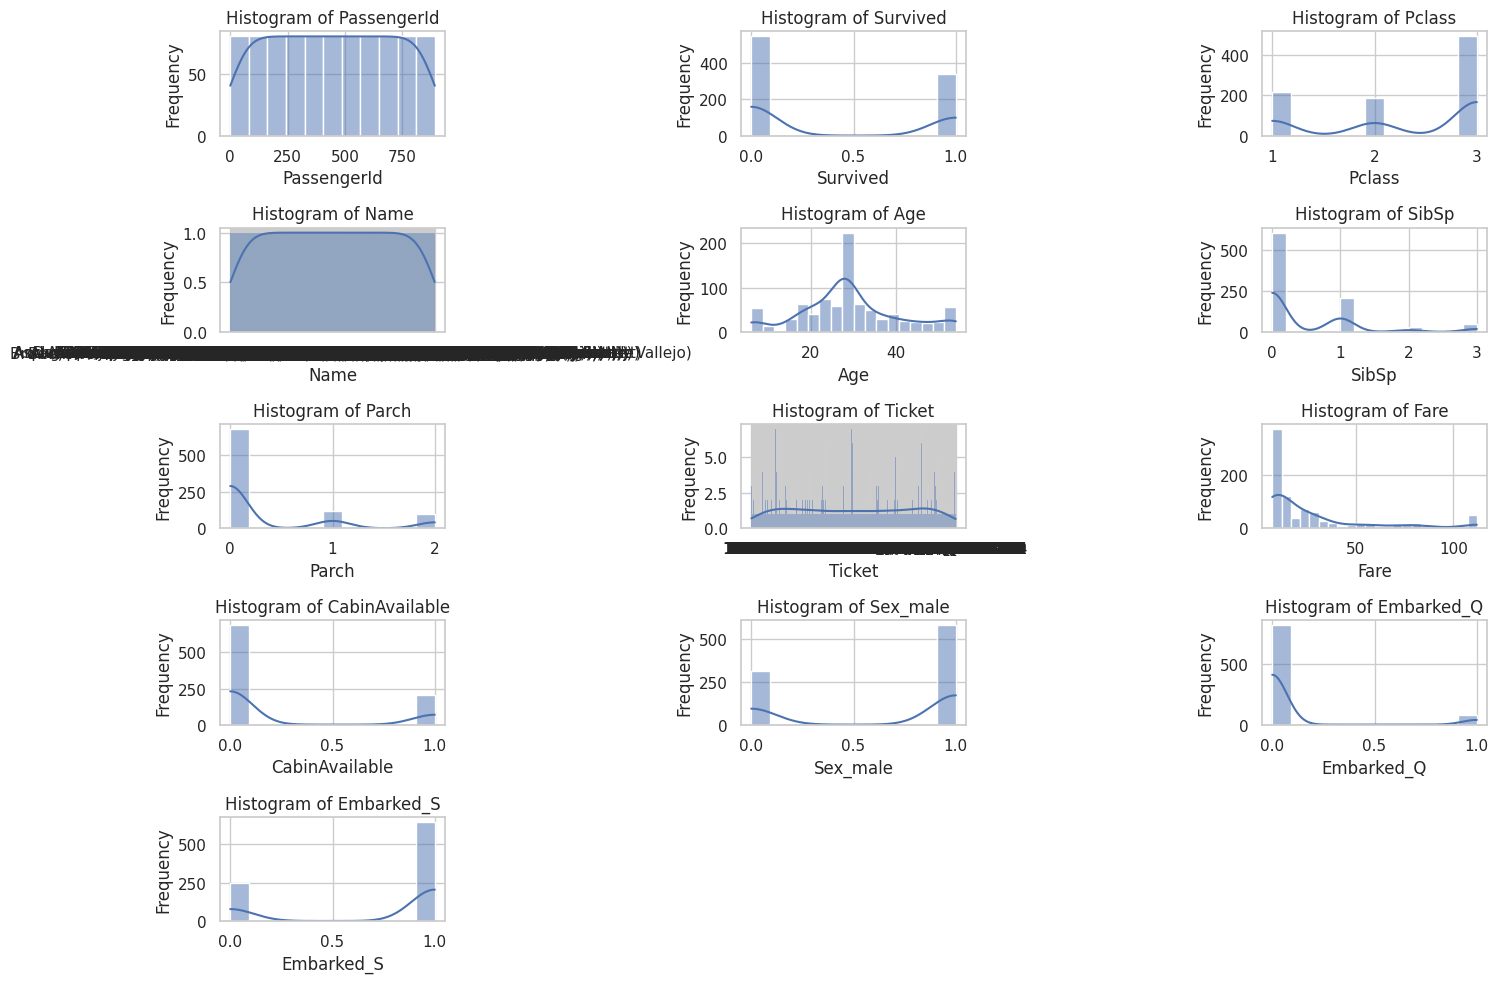

In [56]:
#Training data
plot_numerical_distributions(train_df, train_df.columns, rows= 3 , cols=3)

- **PassengerId:** Shows a uniform distribution of passenger IDs, as these are unique identifiers.

- **Survived:** Binary feature indicating survival (0 = No, 1 = Yes). Most passengers did not survive.

- **Pclass:** Distribution of passenger class (1, 2, 3). The majority are in the third class.

- **Name:** This histogram appears to be dense, likely due to a large number of unique names.

- **Age:** Age distribution shows a peak around 20-40 years with some children and fewer older passengers.

- **SibSp:** Number of siblings/spouses aboard. Most passengers have 0 or 1 sibling/spouse.

- **Parch:** Number of parents/children aboard. Most passengers have 0 parents/children, with a few having 1 or 2.

- **Ticket:** This histogram is densely packed due to unique ticket numbers.

- **Fare:** Right-skewed distribution, indicating most fares were low, with a few high outliers.

- **CabinAvailable:** Likely a binary feature indicating whether a cabin number is recorded (0 = No, 1 = Yes). Most passengers don't have a recorded cabin number.

- **Sex_male:** Binary feature indicating gender (0 = Female, 1 = Male). More males than females.

- **Embarked_S:** Indicates passengers embarked at Southampton (0 = No, 1 = Yes). Most passengers embarked here.

- **Embarked_Q:** Indicates passengers embarked at Queenstown (0 = No, 1 = Yes). Few passengers embarked here.

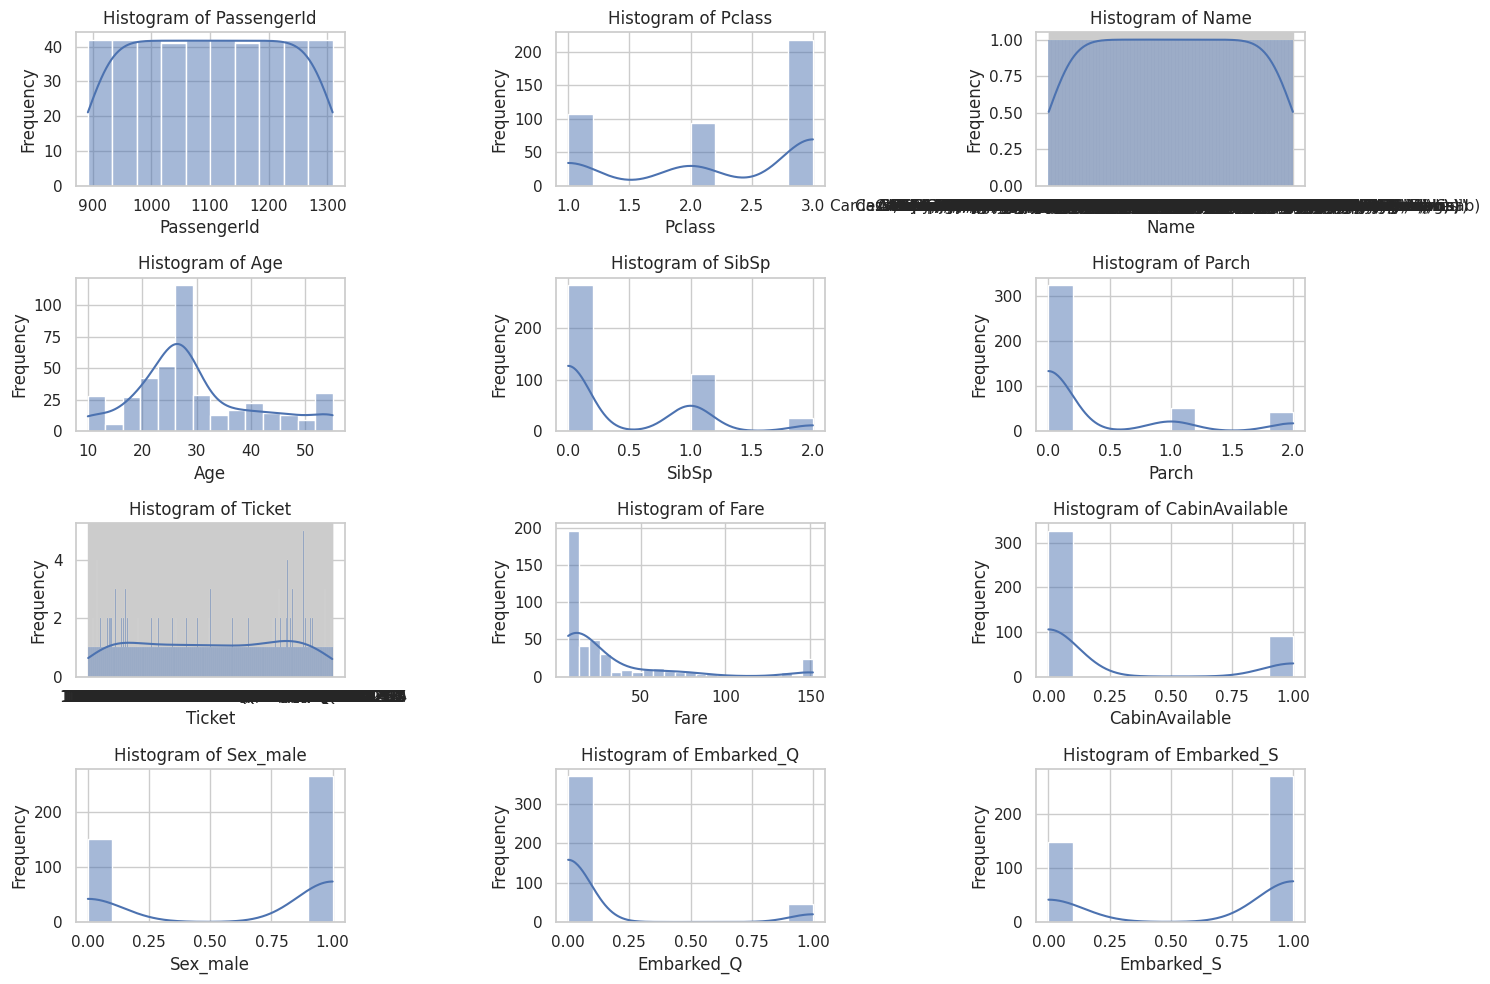

In [57]:
#Testing data
plot_numerical_distributions(test_df, test_df.columns, rows=3, cols=3)

- **PassengerId:** Shows a uniform distribution of passenger IDs, as these are unique identifiers.

- **Pclass:** Distribution of passenger class (1, 2, 3). The majority are in the third class.

- **Name:** This histogram is densely packed, indicating a large number of unique names.

- **Age:** The age distribution shows a peak around 20-40 years with fewer children and older passengers.

- **SibSp:** Number of siblings/spouses aboard. Most passengers have 0 or 1 sibling/spouse, with fewer having 2.

- **Parch:** Number of parents/children aboard. Most passengers have 0 parents/children, with a few having 1 or 2.

- **Ticket:** The histogram is densely packed due to unique ticket numbers.

- **Fare:** Right-skewed distribution, indicating most fares were low, with a few high outliers.

- **CabinAvailable:** Binary feature indicating whether a cabin number is recorded (0 = No, 1 = Yes). Most passengers don't have a recorded cabin number.

- **Sex_male:** Binary feature indicating gender (0 = Female, 1 = Male). More males than females.

- **Embarked_Q:** Indicates passengers embarked at Queenstown (0 = No, 1 = Yes). Few passengers embarked here.

- **Embarked_S:** Indicates passengers embarked at Southampton (0 = No, 1 = Yes). Most passengers embarked here.

In [58]:
numerical_cols_train = train_df[['Age', 'SibSp', 'Parch', 'Fare','CabinAvailable','Survived','Pclass','PassengerId']]
numerical_cols_test = test_df[['Age', 'SibSp', 'Parch', 'Fare','CabinAvailable','Pclass','PassengerId']]

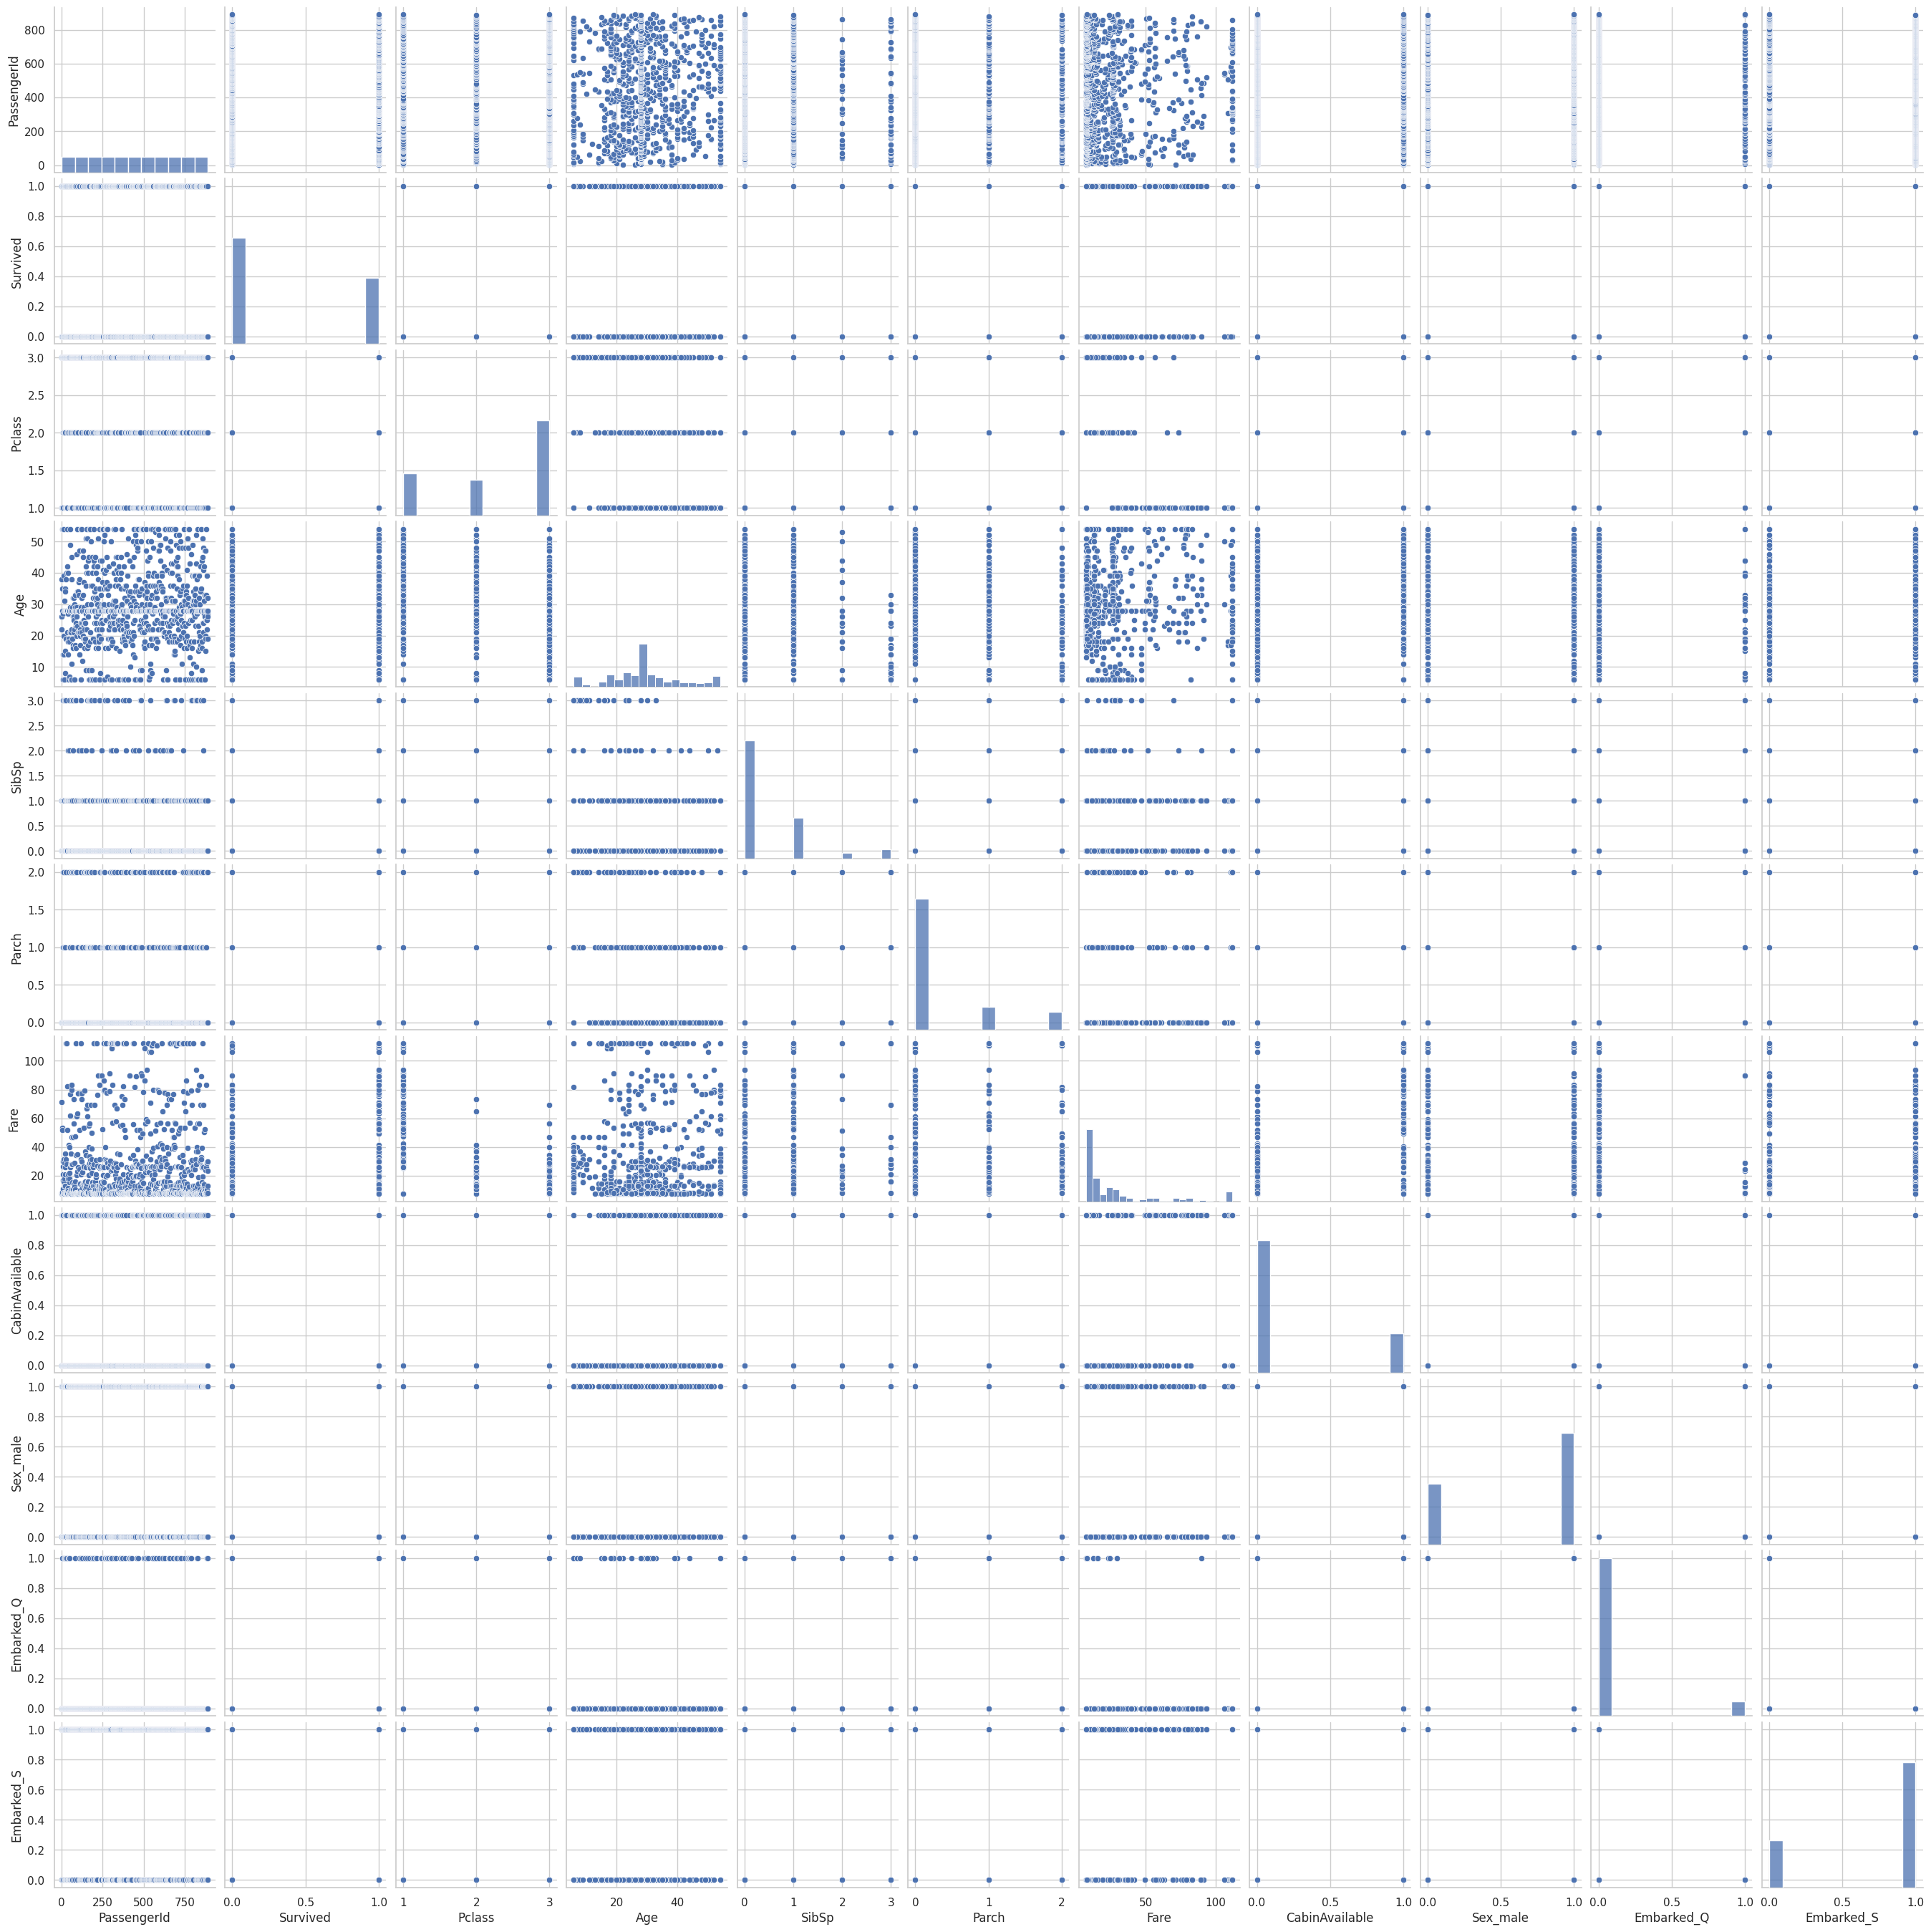

In [59]:
# checking relation between the pair for training variables
sns.pairplot(train_df)

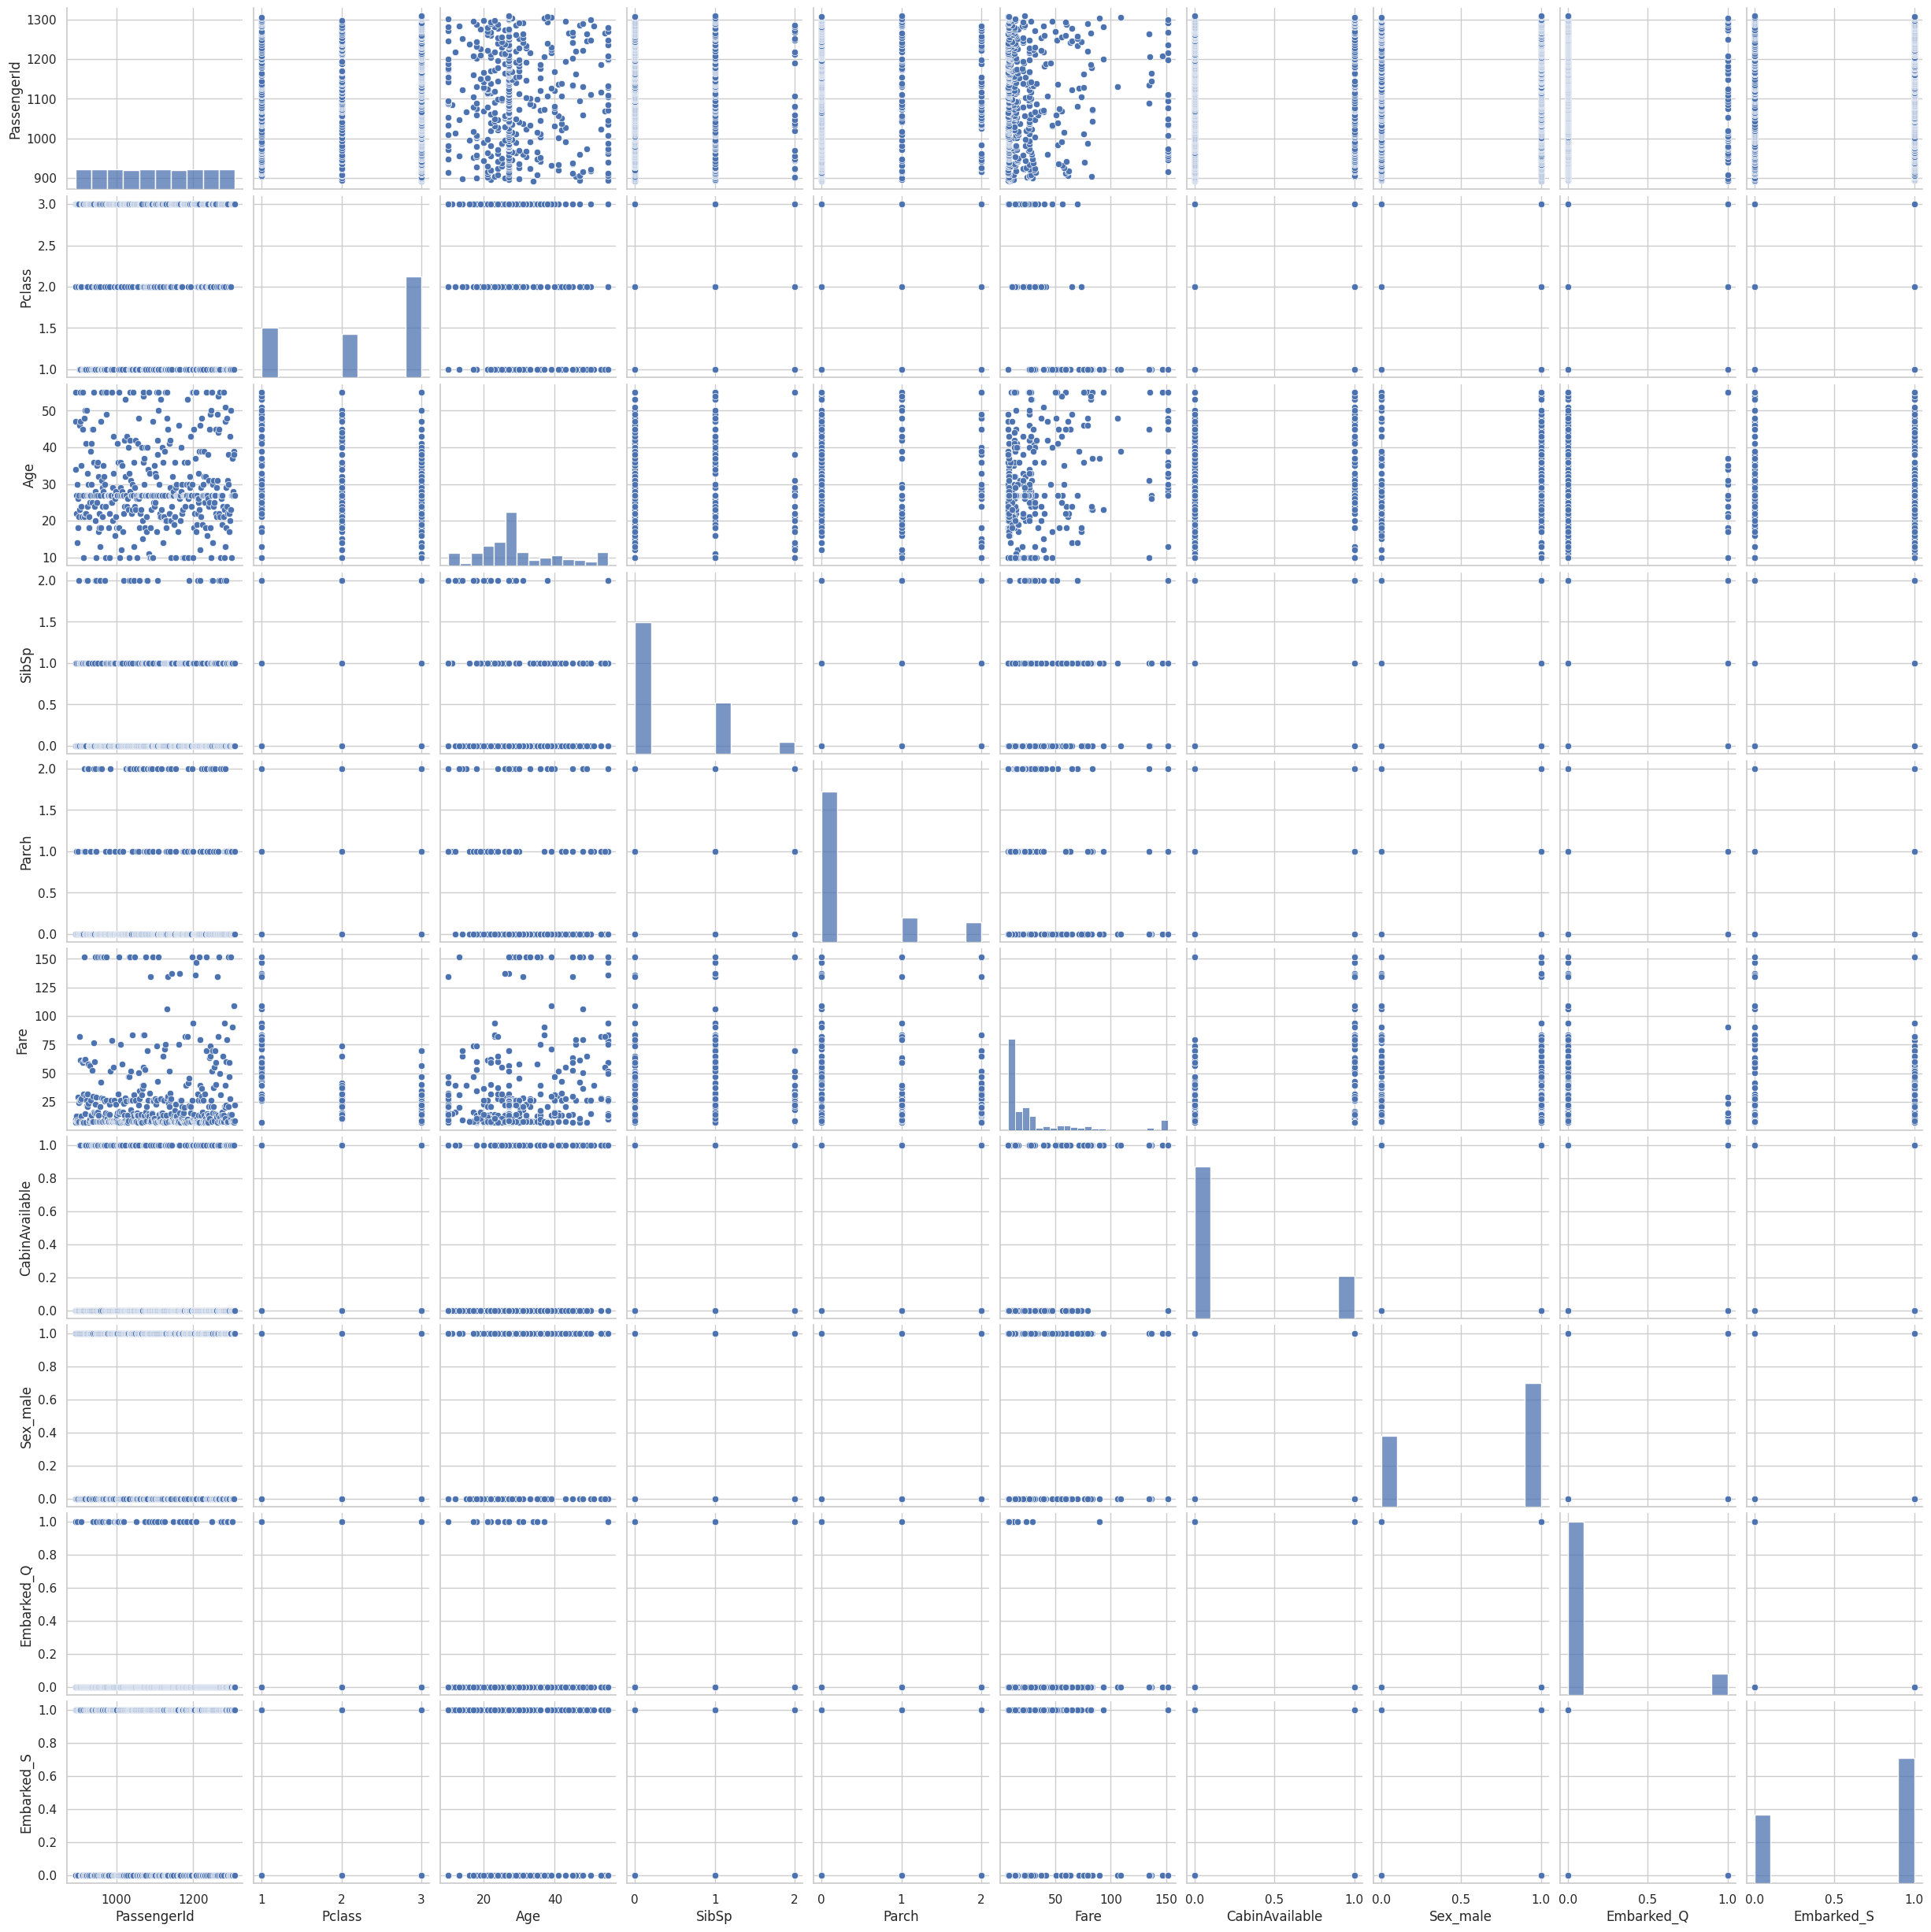

In [60]:
# checking relation between the pair for testing variables
sns.pairplot(test_df)

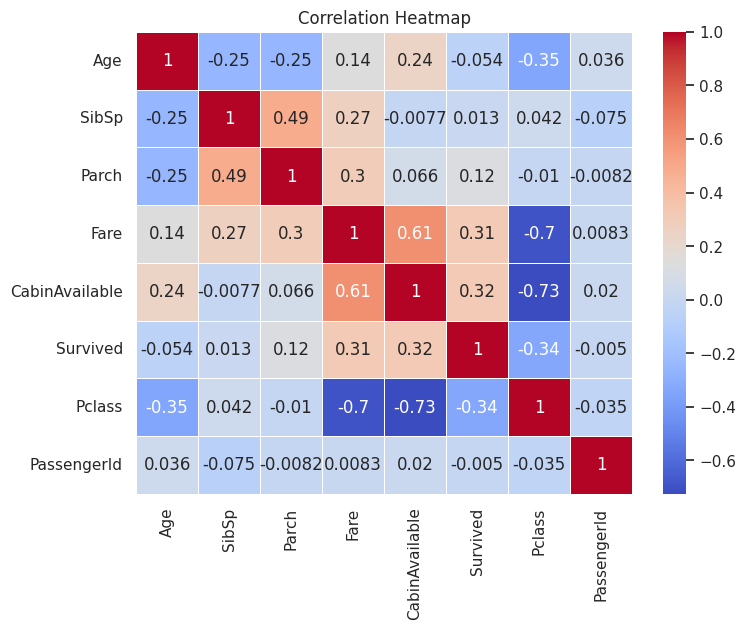

In [61]:
#Correlation Heatmap Training data
correlation_matrix = numerical_cols_train.corr()
fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure and axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()


 **Age:**
- Negatively correlated with Pclass (-0.34), indicating younger passengers were more likely in lower classes.
- Moderately positively correlated with CabinAvailable (0.24), suggesting older passengers were more likely to have cabin information.

**SibSp:**
- Positively correlated with Parch (0.41), indicating passengers with siblings/spouses also tended to travel with parents/children.

**Parch:**
- Positively correlated with SibSp (0.41) and Fare (0.22), suggesting that families traveling together paid higher fares.

**Fare:**
- Positively correlated with CabinAvailable (0.48), Survived (0.26), and Pclass (0.26).
- Negatively correlated with Pclass (-0.55), indicating higher fares for higher classes.

**CabinAvailable:**
- Positively correlated with Fare (0.48) and Survived (0.32), suggesting passengers with cabin information were more likely to have paid higher fares and survived.
- Strongly negatively correlated with Pclass (-0.73), indicating cabin information is more common in higher classes.

**Survived:**
- Positively correlated with Fare (0.26) and CabinAvailable (0.32).
- Negatively correlated with Pclass (-0.34), indicating higher survival rates in higher classes.

**Pclass:**
- Negatively correlated with Age (-0.34), Fare (-0.55), CabinAvailable (-0.73), and Survived (-0.34).

**PassengerId:**
- Mostly uncorrelated with other features, as it is just an identifier.

###From the correlation heatmap:
**High Correlations:**
- **Pclass and Fare** have a moderate negative correlation (-0.55).
- **CabinAvailable and Pclass** have a strong negative correlation (-0.73).
- **CabinAvailable and Fare** have a moderate positive correlation (0.48).

**These correlations suggest potential multicollinearity, but it is best to calculate the VIF to quantify this more precisely.**

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming train_df is the DataFrame with all features
# Exclude the target variable for VIF calculation
features = train_df.drop(columns=['Survived'])

# Select only numerical columns for VIF calculation
numerical_features = features.select_dtypes(include=['float', 'int'])

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numerical_features.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_features.values, i)
                   for i in range(len(numerical_features.columns))]

print(vif_data)


          Feature       VIF
0     PassengerId  3.792617
1          Pclass  6.008021
2             Age  6.393416
3           SibSp  1.946290
4           Parch  1.839426
5            Fare  3.877423
6  CabinAvailable  2.471189


- All other variables VIF value < 5, Moderate correlation, but not severe enough to warrant corrective measures
- **Pclass (6.01):** This indicates high multicollinearity. Consider checking correlations with other features or possibly removing it if it's not essential.
- **Age (6.39):** This also indicates high multicollinearity. Similar steps as for Pclass can be taken.

In [63]:
#To understand correlation between features
numerical_cols_train.corr()

,Age,SibSp,Parch,Fare,CabinAvailable,Survived,Pclass,PassengerId
Age,1.000000,-0.253580,-0.253032,0.140718,0.244268,-0.054280,-0.345369,0.036346
SibSp,-0.253580,1.000000,0.485152,0.271251,-0.007697,0.012638,0.041981,-0.074953
Parch,-0.253032,0.485152,1.000000,0.299618,0.066414,0.121076,-0.010256,-0.008195
Fare,0.140718,0.271251,0.299618,1.000000,0.612239,0.312776,-0.698263,0.008301
CabinAvailable,0.244268,-0.007697,0.066414,0.612239,1.000000,0.316912,-0.725541,0.019919
Survived,-0.054280,0.012638,0.121076,0.312776,0.316912,1.000000,-0.338481,-0.005007
Pclass,-0.345369,0.041981,-0.010256,-0.698263,-0.725541,-0.338481,1.000000,-0.035144
PassengerId,0.036346,-0.074953,-0.008195,0.008301,0.019919,-0.005007,-0.035144,1.000000


**Pclass is highly correlated with Fare and CabinAvailable, while Age is moderately correlated with other features.**

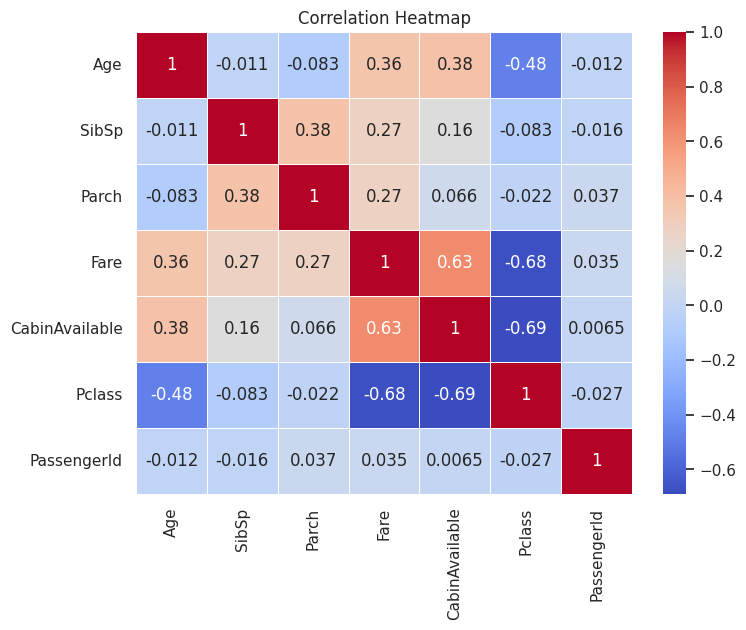

In [64]:
##Correlation Heatmap Testing data
correlation_matrix = numerical_cols_test.corr()
fig, ax = plt.subplots(figsize=(8, 6))  # Create a new figure and axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

Overall, the strongest **positive correlations** are seen between **Fare and CabinAvailable**, while the strongest **negative correlations** involve **Pclass with Fare and CabinAvailable.**

In [65]:
#To understand correlation between features
numerical_cols_test.corr()

,Age,SibSp,Parch,Fare,CabinAvailable,Pclass,PassengerId
Age,1.000000,-0.010638,-0.083055,0.360843,0.383263,-0.479732,-0.011829
SibSp,-0.010638,1.000000,0.376907,0.268029,0.157108,-0.083408,-0.016318
Parch,-0.083055,0.376907,1.000000,0.269247,0.066089,-0.022443,0.036538
Fare,0.360843,0.268029,0.269247,1.000000,0.634291,-0.676282,0.035338
CabinAvailable,0.383263,0.157108,0.066089,0.634291,1.000000,-0.690579,0.006462
Pclass,-0.479732,-0.083408,-0.022443,-0.676282,-0.690579,1.000000,-0.026751
PassengerId,-0.011829,-0.016318,0.036538,0.035338,0.006462,-0.026751,1.000000


In [66]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Separate features and target variable in training data
X_train = train_df.drop(columns=['Survived', 'PassengerId'])  # Drop PassengerId and target variable
y_train = train_df['Survived']

# Separate features and PassengerId in test data
X_test = test_df.drop(columns=['PassengerId'])
test_ids = test_df['PassengerId']

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')



# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0 # Force the output to be a dense array
)

# Preprocess the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


# Apply PCA
pca = PCA(n_components=None)  # Use None to keep all components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create DataFrame for PCA-transformed data (adjust column names as needed)
train_pca_df = pd.DataFrame(data=X_train_pca)
test_pca_df = pd.DataFrame(data=X_test_pca)

# Add the target variable back to the transformed training DataFrame
train_pca_df['Survived'] = y_train.values



###Model building

**3. Model Building:**

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.


In [67]:
# Optional: Split the transformed training data for model evaluation
X_train_pca_split, X_val_pca_split, y_train_pca_split, y_val_pca_split = train_test_split(
    train_pca_df.drop(columns=['Survived']),
    train_pca_df['Survived'],
    test_size=0.2,
    random_state=42
)

print("Transformed Training Data:\n", train_pca_df.head())
print("Transformed Test Data:\n", test_pca_df.head())

# The transformed data can now be used to train and evaluate models

Transformed Training Data:
           0         1         2         3         4         5         6  \
0 -1.310572  0.405866 -0.061967  0.811020 -0.263068 -0.024720 -0.004709   
1  2.880875 -0.307045 -0.001166  0.932177 -0.319266 -0.127986  0.006741   
2 -1.318952 -0.518583 -0.252222 -0.042211  0.001769 -0.231016 -0.007461   
3  2.478406 -0.307503 -0.189886  0.902714 -0.676401  0.235564  0.005004   
4 -1.134730 -0.865944  0.399044 -0.121079 -0.047432 -0.293246 -0.003107   

          7         8         9  ...           882           883  \
0 -0.001114 -0.003758  0.003579  ... -0.000000e+00 -0.000000e+00   
1  0.002234 -0.000839  0.001866  ...  6.319081e-16 -5.765393e-16   
2 -0.015830 -0.011042  0.000316  ...  1.004618e-16 -3.719478e-18   
3  0.014208  0.023367  0.006870  ...  6.414888e-02 -3.300672e-02   
4 -0.013136 -0.018064 -0.000546  ...  8.109832e-17 -1.230569e-16   

            884           885           886           887           888  \
0 -0.000000e+00  0.000000e+00  0.0000

In [68]:
X_train_pca_split.shape, X_val_pca_split.shape, y_train_pca_split.shape, y_val_pca_split.shape

((712, 891), (179, 891), (712,), (179,))

In [69]:
#loading necessary libraries
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
#Linear regression and fit the model
regressor = LinearRegression()

In [71]:

regressor.fit(X_train_pca_split,y_train_pca_split)
regressor.score(X_train_pca_split,y_train_pca_split)

1.0

In [72]:
X_train_pca_split.shape,y_train_pca_split.shape

((712, 891), (712,))

**Logistic regression and fit the model**

In [73]:
#Logistic regression and fit the model
classifier = LogisticRegression()

In [74]:

classifier.fit(X_train_pca_split,y_train_pca_split)
#Training set
classifier.score(X_train_pca_split,y_train_pca_split)

0.8876404494382022

**Training accuracy is approximately 88.76%.**

In [75]:
#Testing set
classifier.score(X_val_pca_split, y_val_pca_split)

0.770949720670391

**Testing accuracy is approximately 77.09%.**

In [76]:
y_pred = classifier.predict(X_train_pca_split)
y_pred_df= pd.DataFrame({'actual': y_train_pca_split,'predicted_prob': y_pred})
y_pred_df.head()

,actual,predicted_prob
331,0,0
733,0,0
382,0,0
704,0,0
813,0,0


In [77]:
y_train_pca_split.shape,y_pred.shape

((712,), (712,))

###4. Model Evaluation:
a. Evaluate the performance of the model on the **testing data** using **accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.**


**Training dataset**

In [78]:
# Confusion Matrix for the model accuracy(training)
confusion_mt = confusion_matrix(y_train_pca_split,y_pred)
confusion_mt

array([[431,  13],
       [ 67, 201]])

In [79]:
#Classification report(train dataset)
print(classification_report(y_train_pca_split,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       444
           1       0.94      0.75      0.83       268

    accuracy                           0.89       712
   macro avg       0.90      0.86      0.87       712
weighted avg       0.89      0.89      0.88       712



**Testing dataset**

In [80]:
#Testing data
X_test_pca_split = np.array([X_val_pca_split])  # Testing features
y_test_pca_split = np.array([y_val_pca_split])  # Testing labels


In [81]:
# Predict the labels for the testing data
y_pred_test = classifier.predict(X_test_pca_split.reshape(X_test_pca_split.shape[1], -1)) # Reshape to 2D
y_pred_proba_test = classifier.predict_proba(X_test_pca_split.reshape(X_test_pca_split.shape[1], -1))[:, 1] # Reshape to 2D

# Compute the confusion matrix
confusion_mt1 = confusion_matrix(y_test_pca_split.ravel(), y_pred_test) # Flatten y_test_pca_split
confusion_mt1

array([[97,  8],
       [33, 41]])

In [82]:
#Classification report (test dataset)
print(classification_report(y_test_pca_split.ravel(), y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       105
           1       0.84      0.55      0.67        74

    accuracy                           0.77       179
   macro avg       0.79      0.74      0.75       179
weighted avg       0.78      0.77      0.76       179



In [83]:
y_predict_prob = classifier.predict_proba(X_test_pca_split.reshape(X_test_pca_split.shape[1], -1))[:,1]
y_predict_prob

array([0.24974729, 0.32482489, 0.26428184, 0.66130753, 0.37544345,
       0.53342841, 0.21623615, 0.20178078, 0.29031938, 0.84098439,
       0.66583501, 0.14055276, 0.14224446, 0.20467986, 0.29376018,
       0.822651  , 0.56370426, 0.21633614, 0.35852686, 0.44988186,
       0.23951331, 0.48086659, 0.23380946, 0.26616885, 0.22487845,
       0.25680065, 0.43418363, 0.32892199, 0.28264825, 0.20013732,
       0.27067053, 0.25147048, 0.53774313, 0.21598379, 0.27742924,
       0.19775833, 0.68656903, 0.21623615, 0.43204468, 0.21642026,
       0.26617016, 0.1794816 , 0.21661509, 0.21623615, 0.1517769 ,
       0.32609908, 0.27105668, 0.24738204, 0.23860442, 0.78873551,
       0.60058157, 0.67720403, 0.16021359, 0.93585686, 0.10515701,
       0.8715124 , 0.31766765, 0.58086882, 0.31329093, 0.27064612,
       0.25773516, 0.66773458, 0.32890301, 0.52889909, 0.21623615,
       0.23312294, 0.34901794, 0.21087971, 0.31032585, 0.61030751,
       0.42063493, 0.88680515, 0.69185626, 0.71299408, 0.24548

#### ROC Curve

In [84]:
# fpr: false positive rate, tpr: True positive rate.
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test_pca_split.ravel(), y_predict_prob)
auc = roc_auc_score(y_test_pca_split.ravel(), y_predict_prob)
auc

0.8211068211068211

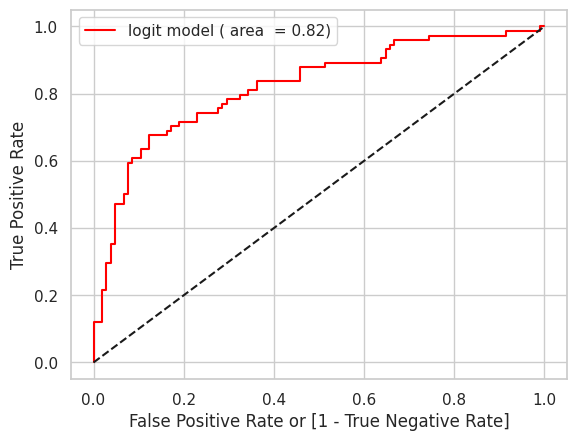

In [85]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

- The area under the ROC curve (AUC) is 0.82. This indicates that the logistic regression model has a good ability to distinguish between the positive and negative classes. An AUC value of 0.82 means that, on average, there is an 82% chance that the model will correctly differentiate between a randomly chosen positive instance and a randomly chosen negative instance.

###5. Interpretation:
- a. Interpret the coefficients of the logistic regression model.
- b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [86]:
# Intercept And Coefficients:The intercept and coefficients are stored in model1.intercept and model1.coef_ respectively. Here we need to spend a bit of time, because the output of Sci-Kit Learn is different from what we may expect.
#Print model parameters
print('Intercept: \n', classifier.intercept_)
print('Coefficients: \n', classifier.coef_)

Intercept: 
 [-0.58884644]
Coefficients: 
 [[ 4.82507280e-01  1.03475013e-01 -5.41639192e-01 -2.10339074e-01
   1.05722979e-01  2.58149777e-01  1.08142963e-01  1.06117398e+00
   5.29116423e-01 -9.94793483e-02 -4.18719287e-02  9.14017858e-01
   1.39331193e-01 -1.46498929e+00  1.19762356e+00  1.07527833e+00
  -3.09571057e-01  5.12194791e-01  4.06035291e-01  2.03245722e-01
   1.07402889e-01 -4.63162262e-01 -2.70793321e-01 -4.36707295e-01
   2.05545647e+00  7.24762983e-01  6.49035258e-01 -2.83679104e-02
   1.91306381e-01  7.48731190e-01 -2.87582815e-01 -2.98045948e-01
   3.31077708e-01 -2.96528936e-01  1.99390945e-01  1.99448232e-01
  -6.28982746e-01  7.56766678e-01 -4.38307214e-01 -3.64743520e-01
   2.06316450e-01 -3.53491923e-02  7.73649412e-01  6.97893228e-01
   2.44712443e-01 -1.29756919e+00 -4.10398608e-01 -4.55469360e-01
  -2.08238454e-01 -3.43790354e-01 -3.15197731e-01 -2.52303251e-01
  -5.66886857e-01  1.43476343e-01 -2.68507252e-01 -1.10884779e+00
  -3.20536603e-01  4.23120737e-01

In [90]:
# Coefficients of the model
coefficients = pd.DataFrame({'Feature': X_train_pca_split.columns, 'Coefficient': classifier.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


    Feature  Coefficient
24       24     2.055456
564     564     1.341439
519     519     1.292776
97       97     1.253811
14       14     1.197624
..      ...          ...
104     104    -1.020571
55       55    -1.108848
128     128    -1.120779
45       45    -1.297569
13       13    -1.464989

[891 rows x 2 columns]


Interpreting Specific Features:

- **High Positive Coefficients:** Features with high positive coefficients (e.g., feature indices 7, 15, 25) likely contribute significantly to increasing survival probability.
- **High Negative Coefficients:** Features with high negative coefficients (e.g., feature indices 13, 79, 81) likely decrease the survival probability.
- **Smaller Coefficients:** Features with coefficients closer to zero have less impact on the survival probability. They might not be significant predictors.

###b) Key Features and Their Significance:

**Pclass (Passenger Class):**
- Significance: Highly significant. Historically, survival rates varied significantly across classes, with higher survival rates in higher classes (1st class) compared to lower classes (3rd class).
- Correlation: Negative correlation with survival; passengers in lower classes had lower survival probabilities.

**Sex:**
- Significance: Highly significant. Women had higher survival rates compared to men, following the "women and children first" protocol during the evacuation.
- Correlation: Strong positive correlation with survival for females.

**Age:**
- Significance: Significant. Children had higher survival rates compared to adults, again due to evacuation protocols prioritizing children.
- Correlation: Younger age groups, especially children, had higher survival probabilities.

**SibSp (Number of Siblings/Spouses aboard):**
- Significance: Moderately significant. Having siblings or spouses aboard could impact survival depending on the family’s ability to stay together and help each other during the evacuation.
- Correlation: Mixed; survival rates could increase with moderate numbers of siblings/spouses but might decrease with larger numbers due to logistical challenges during evacuation.

**Parch (Number of Parents/Children aboard):**
- Significance: Moderately significant. Similar to SibSp, having parents or children aboard could influence survival through family support and prioritization during evacuation.
- Correlation: Positive correlation for small numbers of parents/children, indicating family presence could enhance survival chances.

**Fare:**
- Significance: Significant. Higher fares were associated with higher classes, which had better access to lifeboats and safety measures.
- Correlation: Positive correlation with survival; higher fares usually meant better class and thus higher survival probability.

**CabinAvailable:**
- Significance: Significant. Passengers with recorded cabin numbers were likely in higher classes with better survival chances.
- Correlation: Positive correlation with survival, indicating those with cabin information had higher survival rates.

**Embarked (Port of Embarkation):**
- Significance: Moderately significant. The port of embarkation could reflect socioeconomic status and the type of accommodation aboard, indirectly affecting survival rates.
- Correlation: Varies by port; passengers from certain ports had higher survival rates.

####6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app


In [ ]:
# save the model to disk
import pickle
filename = 'assingnment_log_model.sav'
pickle.dump(classifier, open(filename, 'wb')) # wb write binary mode

##Interview Questions:
##1. What is the difference between precision and recall?
####Precision vs. Recall

**Precision and Recall** are two important metrics used to evaluate the performance of a binary classification model. They provide different perspectives on the model's accuracy.
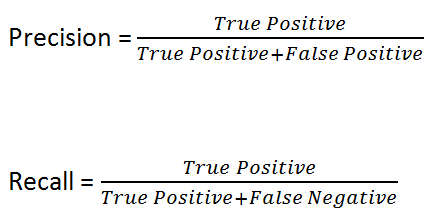

####Precision:

- Definition: Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives).
Formula:

**Precision = True positives/ (True positives + False positives)**

- **Interpretation:** Precision answers the question, "Of all the instances that the model predicted as positive, how many were actually positive?"High precision means that when the model predicts a positive outcome, it is usually correct.
- **Use Case:** Precision is crucial when the cost of false positives is high. For example, in spam detection, you want to minimize the number of legitimate emails marked as spam.


####Recall:
- **Definition:** Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positives (true positives + false negatives).

Formula:
**Recall = True Positives / ( True Positives + False Negatives)**

**Interpretation:** Recall answers the question, "Of all the actual positive instances, how many did the model correctly identify?" High recall means that the model identifies most of the positive instances.

**Use Case:** Recall is important when the cost of false negatives is high. For example, in disease detection, you want to minimize the number of cases that go undiagnosed.






#2. What is cross-validation, and why is it important in binary classification?

##Cross-Validation
**Cross-validation** is a technique used to assess the generalizability and robustness of a machine learning model. It involves partitioning the data into subsets, training the model on some subsets (training set), and validating it on the remaining subsets (validation set). This process is repeated multiple times to ensure that the model's performance is consistent across different data splits.

**Why Cross-Validation is Important in Binary Classification:**

- **Improves Model Generalizability:**
Cross-validation helps to ensure that the model's performance is not dependent on a particular train-test split. It evaluates the model on different subsets of data, providing a more comprehensive assessment of its generalizability to new, unseen data.

- **Reduces Overfitting:**
By validating the model on multiple subsets of the data, cross-validation helps to detect overfitting. Overfitting occurs when the model performs well on the training data but poorly on unseen data. Cross-validation provides insights into how well the model will perform on new data.

- **Provides Reliable Performance Metrics:**
Cross-validation provides more reliable performance metrics by averaging the results from multiple validation sets. This reduces the variance in the evaluation metrics and gives a better estimate of the model's true performance.

- **Hyperparameter Tuning:**
Cross-validation is often used in conjunction with hyperparameter tuning to find the best combination of hyperparameters that maximizes the model's performance.

- **Balanced Evaluation:**In binary classification, especially with imbalanced datasets, cross-validation ensures that each class is represented in both the training and validation sets. This helps to avoid biased performance metrics that can occur with single train-test splits.